In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('DailyDelhiClimateTest.csv')
df


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [22]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [23]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' to datetime format
df['year'] = df['date'].dt.year          # Extract year
df['month'] = df['date'].dt.month        # Extract month
df['day'] = df['date'].dt.day            # Extra

In [24]:
df.drop('date', axis=1, inplace=True)

In [25]:
df.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
year              int32
month             int32
day               int32
dtype: object

In [26]:
df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
year            0
month           0
day             0
dtype: int64

In [29]:
# Create a binary target variable: 'High' or 'Low' temperature
median_temp = df['meantemp'].median()
df['temp_label'] = df['meantemp'].apply(lambda x: 'High' if x > median_temp else 'Low')


In [30]:
X = df.drop(['meantemp', 'temp_label'], axis=1)  # Features (all columns except 'meantemp' and 'temp_label')
y = df['temp_label']                             # Target variable


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = gnb.predict(X_test)


Accuracy: 0.86
              precision    recall  f1-score   support

        High       0.78      0.93      0.85        15
         Low       0.94      0.80      0.86        20

    accuracy                           0.86        35
   macro avg       0.86      0.87      0.86        35
weighted avg       0.87      0.86      0.86        35



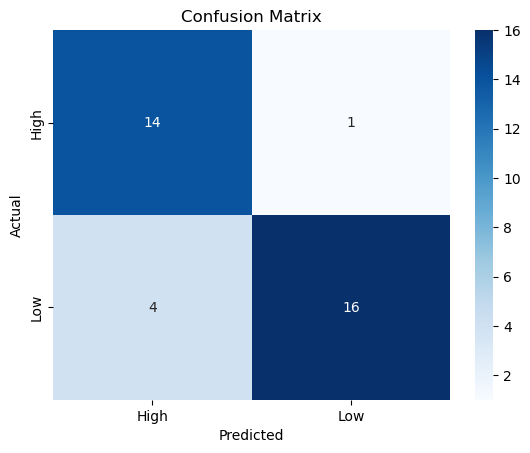

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low'], yticklabels=['High', 'Low'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()